## Task 4: Plot the mean annual temperatures versus the DTM heights for the DWD stations in Bavaria. Do you find a ways to perform a linear regression to the data with numpy? What is the temperature gradient, i.e. the slope of the regression line in units K/m or °C/m?

In [1]:
import numpy as np # numpy arrays and functions for example replacing bad values with true NotaNumber
import matplotlib.pyplot as plt
%matplotlib inline 
# making plots available in jupyter output line
import pandas as pd # for pandas dataframe to read csv
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # linear regression

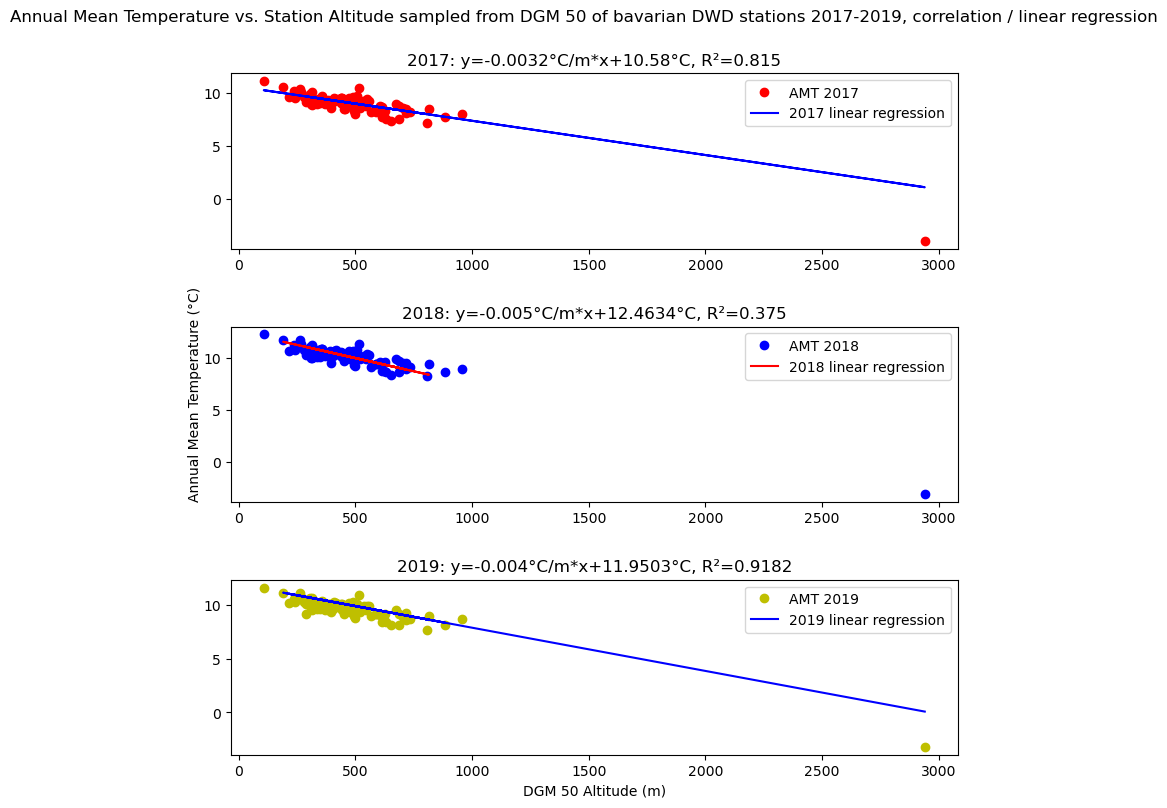

In [2]:
df = pd.read_csv("df_all_dgm50.csv") # reading csv into dataframe

X = np.array(df["dgm50_altitude"]).reshape(-1, 1) # populating an numpy array in correct shape with dataframe values
# 2017,2018,2019
y1 = np.array(df["amt_2017"]).reshape(-1, 1)
y2 = np.array(df["amt_2018"]).reshape(-1, 1)
y3 = np.array(df["amt_2018"]).reshape(-1, 1)

# split values into training values and test values to evaluate the fit of regression
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.25) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.25)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.25)

regr1 = LinearRegression() # initiating linear regression model
regr2 = LinearRegression()
regr3 = LinearRegression()

regr1.fit(X_train1, y_train1) # training / fitting model
regr2.fit(X_train2, y_train2)
regr3.fit(X_train3, y_train3)

score1 = regr1.score(X_test1, y_test1) # calculate score / how well the model describes datapoints
score2 = regr2.score(X_test2, y_test2)
score3 = regr3.score(X_test3, y_test3)

b1 = round((regr1.intercept_[0]),4) # intercept (°C)
b2 = round((regr2.intercept_[0]),4)
b3 = round((regr3.intercept_[0]),4)

m1 = round((regr1.coef_[0][0]),4) # gradient (K/m, °C/m)
m2 = round((regr2.coef_[0][0]),4)
m3 = round((regr3.coef_[0][0]),4)

r1 = round(score1,4)
r2 = round(score2,4)
r3 = round(score3,4)

y_pred1 = regr1.predict(X_test1)
y_pred2 = regr2.predict(X_test2)
y_pred3 = regr3.predict(X_test3)

#plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=100, figsize=(8, 8))
fig.tight_layout(h_pad=4)

ax1.plot(df["dgm50_altitude"], df["amt_2017"], 'ro', label = 'AMT 2017')
ax1.plot(X_test1, y_pred1, 'b', label="2017 linear regression")

ax2.plot(df["dgm50_altitude"], df["amt_2018"], 'bo', label = 'AMT 2018')
ax2.plot(X_test2, y_pred2, 'r', label="2018 linear regression")

ax3.plot(df["dgm50_altitude"], df["amt_2019"], 'yo', label = 'AMT 2019')
ax3.plot(X_test3, y_pred3, 'b', label="2019 linear regression")

fig.suptitle("Annual Mean Temperature vs. Station Altitude sampled from DGM 50 of bavarian DWD stations 2017-2019, correlation / linear regression")
plt.subplots_adjust(top=0.9)
fig.text(0.005, 0.5, "Annual Mean Temperature (°C)", va='center', rotation='vertical')
plt.xlabel("DGM 50 Altitude (m)")

ax1.set_title("2017: y="+str(m1)+"°C/m*x+"+str(b1)+"°C, R²="+str(r1))
ax2.set_title("2018: y="+str(m2)+"°C/m*x+"+str(b2)+"°C, R²="+str(r2))
ax3.set_title("2019: y="+str(m3)+"°C/m*x+"+str(b3)+"°C, R²="+str(r3))


ax1.legend()
ax2.legend()
ax3.legend()

fig.savefig("bavaria_dgm50_altitude_vs_annual_mean_temperature_2017_2019_corr_lr.png")
plt.show()

Without outlier:


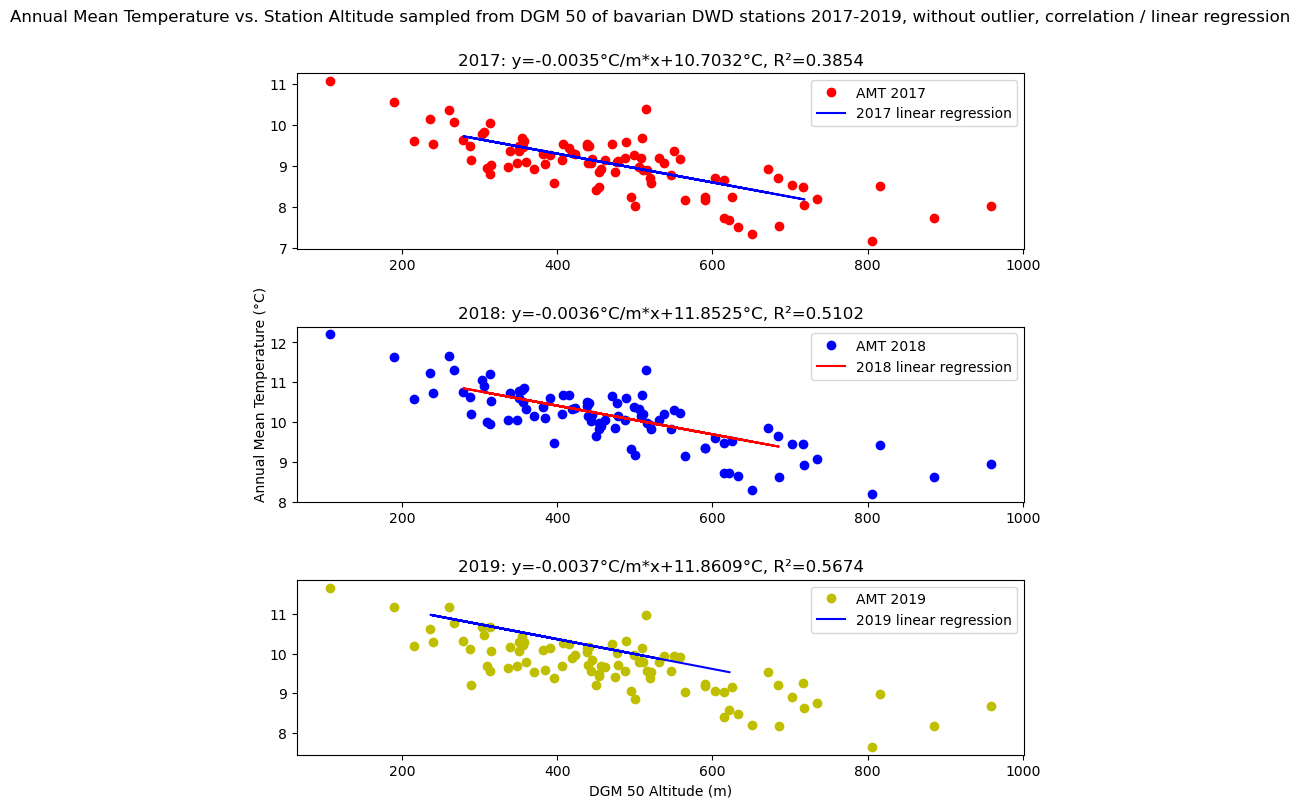

In [3]:
print("Without outlier:")
df = pd.read_csv("df_all_woo_dgm50.csv") # reading csv into dataframe

X = np.array(df["dgm50_altitude"]).reshape(-1, 1) # populating an numpy array in correct shape with dataframe values
# 2017,2018,2019
y1 = np.array(df["amt_2017"]).reshape(-1, 1)
y2 = np.array(df["amt_2018"]).reshape(-1, 1)
y3 = np.array(df["amt_2018"]).reshape(-1, 1)

# split values into training values and test values to evaluate the fit of regression
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y1, test_size = 0.25) 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size = 0.25)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y3, test_size = 0.25)

regr1 = LinearRegression() # initiating linear regression model
regr2 = LinearRegression()
regr3 = LinearRegression()

regr1.fit(X_train1, y_train1) # training / fitting model
regr2.fit(X_train2, y_train2)
regr3.fit(X_train3, y_train3)

score1 = regr1.score(X_test1, y_test1) # calculate score / how well the model describes datapoints
score2 = regr2.score(X_test2, y_test2)
score3 = regr3.score(X_test3, y_test3)

b1 = round((regr1.intercept_[0]),4) # intercept (°C)
b2 = round((regr2.intercept_[0]),4)
b3 = round((regr3.intercept_[0]),4)

m1 = round((regr1.coef_[0][0]),4) # gradient (K/m, °C/m)
m2 = round((regr2.coef_[0][0]),4)
m3 = round((regr3.coef_[0][0]),4)

r1 = round(score1,4)
r2 = round(score2,4)
r3 = round(score3,4)

y_pred1 = regr1.predict(X_test1)
y_pred2 = regr2.predict(X_test2)
y_pred3 = regr3.predict(X_test3)

#plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, dpi=100, figsize=(8, 8))
fig.tight_layout(h_pad=4)

ax1.plot(df["dgm50_altitude"], df["amt_2017"], 'ro', label = 'AMT 2017')
ax1.plot(X_test1, y_pred1, 'b', label="2017 linear regression")

ax2.plot(df["dgm50_altitude"], df["amt_2018"], 'bo', label = 'AMT 2018')
ax2.plot(X_test2, y_pred2, 'r', label="2018 linear regression")

ax3.plot(df["dgm50_altitude"], df["amt_2019"], 'yo', label = 'AMT 2019')
ax3.plot(X_test3, y_pred3, 'b', label="2019 linear regression")

fig.suptitle("Annual Mean Temperature vs. Station Altitude sampled from DGM 50 of bavarian DWD stations 2017-2019, without outlier, correlation / linear regression")
plt.subplots_adjust(top=0.9)
fig.text(0.005, 0.5, "Annual Mean Temperature (°C)", va='center', rotation='vertical')
plt.xlabel("DGM 50 Altitude (m)")

ax1.set_title("2017: y="+str(m1)+"°C/m*x+"+str(b1)+"°C, R²="+str(r1))
ax2.set_title("2018: y="+str(m2)+"°C/m*x+"+str(b2)+"°C, R²="+str(r2))
ax3.set_title("2019: y="+str(m3)+"°C/m*x+"+str(b3)+"°C, R²="+str(r3))


ax1.legend()
ax2.legend()
ax3.legend()

fig.savefig("bavaria_dgm50_altitude_vs_annual_mean_temperature_2017_2019_woo_corr_lr.png")
plt.show()